In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar
from datetime import datetime

# Jupyter Notebook Configuration
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# data: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

In [139]:
data = pd.read_csv('../data/ecommerce_data.csv')

data.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [140]:
data.shape

(536350, 8)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [142]:
# Transform date into datetime format
data['Date'] = pd.to_datetime(data['Date'])

In [154]:
# Create a feature with the value spent in each purchase (assuming each row represents a different purchase)
data['PurchaseValue'] = data['Price'] * data['Quantity']

In [145]:
# Let's get a better understand of the data
data.describe()

,Date,Price,Quantity,CustomerNo,Purchase Value
count,536350,536350.000000,536350.000000,536295.000000,5.363500e+05
mean,2019-07-04 02:52:31.891116032,12.662182,9.919347,15227.893178,1.123893e+02
min,2018-12-01 00:00:00,5.130000,-80995.000000,12004.000000,-8.401138e+05
25%,2019-03-28 00:00:00,10.990000,1.000000,13807.000000,1.618000e+01
50%,2019-07-20 00:00:00,11.940000,3.000000,15152.000000,4.272000e+01
75%,2019-10-19 00:00:00,14.090000,10.000000,16729.000000,1.160000e+02
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.000000,1.002718e+06
std,NaN,8.490450,216.662300,1716.582932,2.277384e+03


In [28]:
# Insights we have here:
# - The average customer has 3 items per purchase
# - The average customer spends 765 per purchase
# - The average return rate seems super high (50%)

In [148]:
# Number of diferent customer
data['CustomerNo'].nunique()

4738

In [153]:
# Period covered by the data
data['Date'].min(), data['Date'].max()

(Timestamp('2018-12-01 00:00:00'), Timestamp('2019-12-09 00:00:00'))

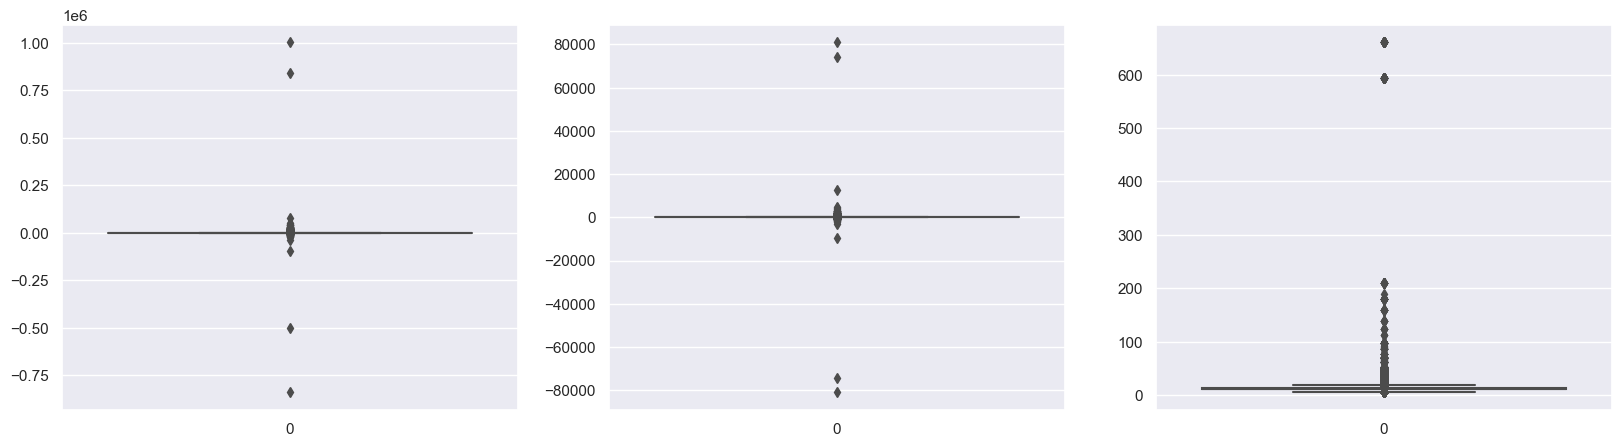

In [157]:
# Distribution of purchase values, quantity and price
fig, ax = plt.subplots(1, 3, figsize = (20, 5))
sns.boxplot(data['PurchaseValue'], ax = ax[0])
sns.boxplot(data['Quantity'], ax = ax[1])
sns.boxplot(data['Price'], ax = ax[2])
plt.show()

In [159]:
# We have negative quantities in the data, which does not make much sense.
# Let's check how many cases of these we have and then drop them
data[data['Quantity'] < 0].shape

data = data[data['Quantity'] > 0]

<Axes: xlabel='Date'>

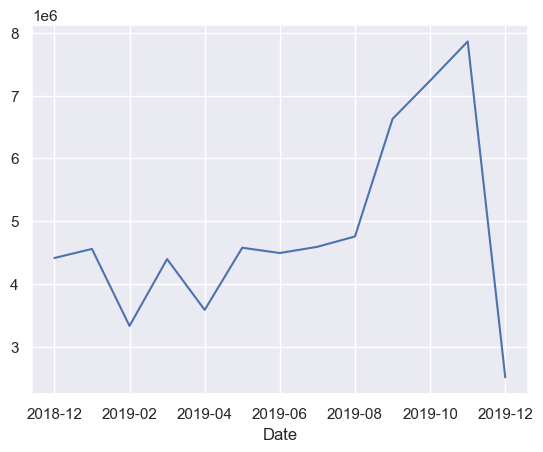

In [188]:
# Plot of purchase values by date in month/year
data.groupby(data['Date'].dt.strftime('%Y-%m'))['PurchaseValue'].sum().plot()

In [162]:
# Create quartiles and percentile rank
data["Quantiles"] = pd.qcut(data['PurchaseValue'], 5)
data["PercentileRank"] = data['PurchaseValue'].rank(pct = True)
data.head(3)

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Purchase Value,PurchaseValue,Quantiles,PercentileRank
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,257.64,"(138.36, 1002718.1]",0.909041
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,383.40,"(138.36, 1002718.1]",0.955401
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,138.36,"(61.9, 138.36]",0.808014


In [163]:
data.sort_values(by = 'PurchaseValue', ascending = False).head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Purchase Value,PurchaseValue,Quantiles,PercentileRank
142,581483,2019-12-09,23843,Paper Craft Little Birdie,12.38,80995,16446.0,United Kingdom,1002718.1,1002718.1,"(138.36, 1002718.1]",1.000000
473985,541431,2019-01-18,23166,Medium Ceramic Top Storage Jar,11.32,74215,12346.0,United Kingdom,840113.8,840113.8,"(138.36, 1002718.1]",0.999998
41367,578841,2019-11-25,84826,Asstd Design 3d Paper Stickers,6.19,12540,13256.0,United Kingdom,77622.6,77622.6,"(138.36, 1002718.1]",0.999996
117790,573008,2019-10-27,84077,World War 2 Gliders Asstd Designs,10.47,4800,12901.0,United Kingdom,50256.0,50256.0,"(138.36, 1002718.1]",0.999994
331834,554868,2019-05-27,22197,Popcorn Holder,10.99,4300,13135.0,United Kingdom,47257.0,47257.0,"(138.36, 1002718.1]",0.999992


In [ ]:
# Moving to the RFV analysis

In [165]:
data_recency = (
    data[['CustomerNo', 'Date']]
    .groupby('CustomerNo')['Date']
    .agg('max')
    .reset_index()
)

data_recency.head()

,CustomerNo,Date
0,12004.0,2019-04-26
1,12006.0,2019-05-05
2,12008.0,2019-03-08
3,12013.0,2018-12-15
4,12024.0,2019-06-16


In [166]:
# Calculate the number of days since the last purchase, taking as reference the last date of the dataset
data_recency['Recency'] = (data['Date'].max() - data_recency['Date']).dt.days

data_recency.head()

,CustomerNo,Date,Recency
0,12004.0,2019-04-26,227
1,12006.0,2019-05-05,218
2,12008.0,2019-03-08,276
3,12013.0,2018-12-15,359
4,12024.0,2019-06-16,176


In [167]:
# Let's see the distribution of recency
data_recency['Recency'].describe()

count    4718.000000
mean       95.992794
std       101.758271
min         0.000000
25%        18.000000
50%        53.000000
75%       155.750000
max       373.000000
Name: Recency, dtype: float64

In [ ]:
# We can see that the average recency is ~3 months

<Axes: xlabel='Recency'>

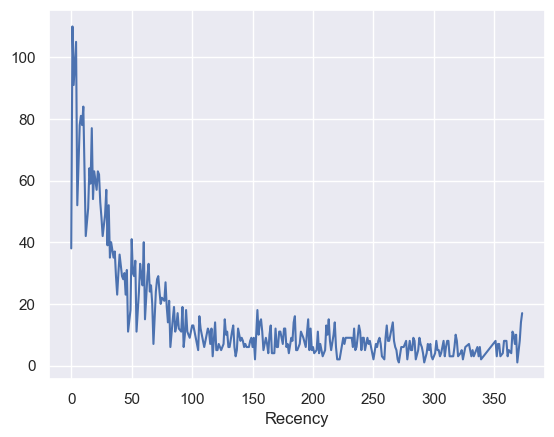

In [170]:
data_recency['Recency'].value_counts().sort_index().plot()

In [171]:
# Drop the date column
data_recency.drop('Date', axis = 1, inplace = True)

In [ ]:
# Now let's calculate the frequency of purchase for each consumer

In [172]:
data_frequency = data[['CustomerNo']]

data_frequency = data_frequency.groupby('CustomerNo').value_counts().reset_index()

# rename columns
data_frequency.rename(
    columns = {'count' : 'Frequency'}, inplace = True
)

In [173]:
# Let's take a look at this data

data_frequency['Frequency'].describe()

count    4718.000000
mean      111.861806
std       234.884482
min         1.000000
25%        19.000000
50%        50.500000
75%       130.000000
max      7835.000000
Name: Frequency, dtype: float64

In [174]:
# Now let's calculate the average purchase value by each consumer

data_value = data[['CustomerNo', 'PurchaseValue']]

data_value = data_value.groupby('CustomerNo')['PurchaseValue'].agg('mean').reset_index()

data_value = data_value.rename(
    columns = {'PurchaseValue' : 'Value'}
)

In [175]:
# Let's also take a look at this data

data_value['Value'].describe()

count      4718.000000
mean        471.716875
std       13246.086964
min           5.970000
25%          49.536951
50%         101.248289
75%         150.808220
max      840113.800000
Name: Value, dtype: float64

In [177]:
# Combine all three data sets that we have create

data_rfv = data_recency.merge(data_frequency, on = 'CustomerNo', how = 'left')
data_rfv = data_rfv.merge(data_value, on = 'CustomerNo', how = 'left')

data_rfv.head()

,CustomerNo,Recency,Frequency,Value
0,12004.0,227,56,26.957143
1,12006.0,218,1,24.760000
2,12008.0,276,203,28.027438
3,12013.0,359,1,69.960000
4,12024.0,176,5,29.904000


In [ ]:
# Now that I have my data set on recency, frequency and value, 
# I want to use a clusterazition algorithm to understand the patterns in the data

# I will use the k-means algorithm for that

In [178]:
# First, we standardize the data

from sklearn.preprocessing import StandardScaler

feature_cols = ['Recency', 'Frequency', 'Value']

standardized_data = data_rfv.copy()

scaler = StandardScaler()
scaler.fit(data_rfv[feature_cols])
standardized_data[feature_cols] = scaler.transform(data_rfv[feature_cols])

In [179]:
standardized_data.head()

,CustomerNo,Recency,Frequency,Value
0,12004.0,1.287572,-0.237852,-0.033580
1,12006.0,1.199118,-0.472034,-0.033746
2,12008.0,1.769156,0.388054,-0.033499
3,12013.0,2.584901,-0.472034,-0.030333
4,12024.0,0.786331,-0.455003,-0.033358


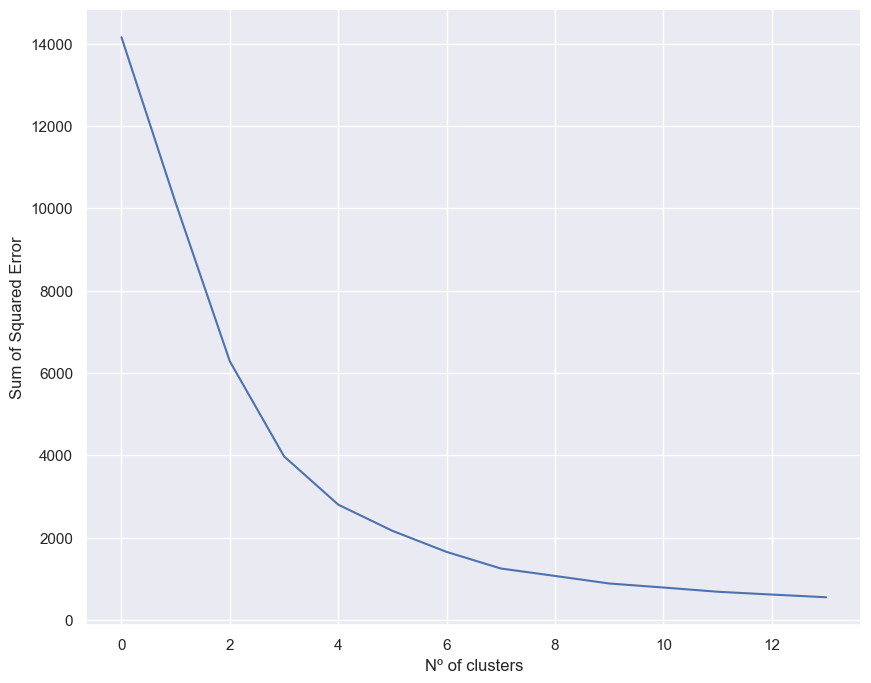

In [180]:
# Now we use the K-means algorithm

from sklearn.cluster import KMeans

sse = []

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(standardized_data[feature_cols])
    sse.append(kmeans.inertia_)

# Elbow method plot
plt.figure(figsize = (10, 8))
plt.plot(sse)
plt.xlabel('Nº of clusters')
plt.ylabel('Sum of Squared Error')
plt.show();

In [181]:
# Let's run the best model (clusters = 3) and add a cluster feature to our data
kmeans = KMeans(n_clusters = 3)
kmeans.fit(standardized_data[feature_cols])

data_rfv['Cluster'] = kmeans.labels_

data_rfv.head()

,CustomerNo,Recency,Frequency,Value,Cluster
0,12004.0,227,56,26.957143,2
1,12006.0,218,1,24.760000,2
2,12008.0,276,203,28.027438,2
3,12013.0,359,1,69.960000,2
4,12024.0,176,5,29.904000,2


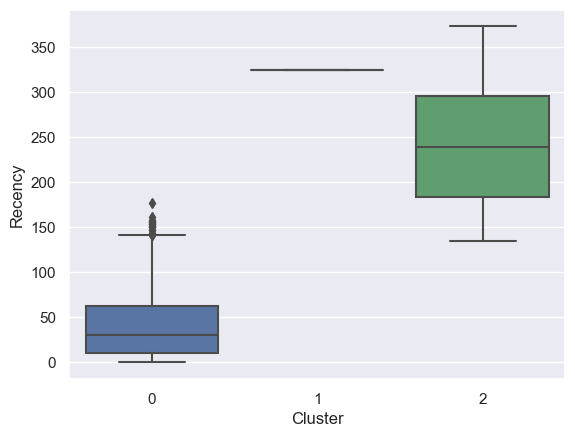

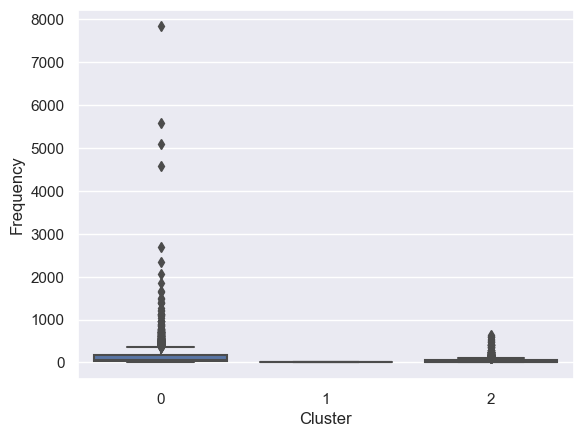

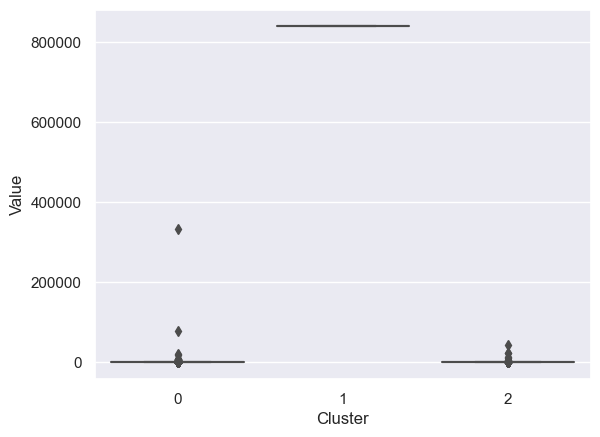

In [182]:
for feature in feature_cols:

    sns.boxplot(x = 'Cluster', y = feature, data = data_rfv)
    plt.show()

In [183]:
# Check the metrics by cluster

centroid_data = (
    data_rfv.groupby('Cluster')[['CustomerNo', 'Recency', 'Frequency', 'Value']]
    .agg(
        {
            'CustomerNo' : 'nunique',
            'Recency' : 'mean',
            'Frequency' : 'mean',
            'Value' : 'mean'
        }
    )
    .reset_index()
)

# Rename columns
centroid_data.rename(columns = {'CustomerNo' : 'Customers'}, inplace = True)

# See the data
centroid_data

,Cluster,Customers,Recency,Frequency,Value
0,0,3437,40.851906,136.290951,312.688403
1,1,1,325.000000,1.000000,840113.800000
2,2,1280,243.875781,46.352344,242.762795


In [184]:
# Create informative labels for each cluster

labels = [
    'Frequent customers',
    'Premium customer',
    'Possible churn'
]

centroid_data['Label'] = labels

centroid_data

,Cluster,Customers,Recency,Frequency,Value,Label
0,0,3437,40.851906,136.290951,312.688403,Frequent customers
1,1,1,325.000000,1.000000,840113.800000,Premium customer
2,2,1280,243.875781,46.352344,242.762795,Possible churn
